In [19]:
from pylab import*
from numpy import*
from matplotlib.pyplot import* 

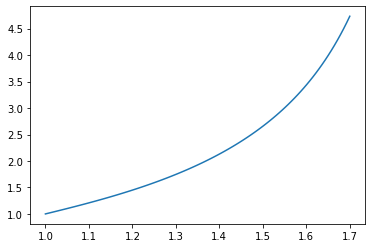

In [20]:
def rk2SYS(f, U0, t):
    n = len(t)
    U = [U0]
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h * f(U[i], t[i])
        k2 = h * f(U[i] + k1, t[i] + h)
        U.append(U[i] + 0.5 * (k1 + k2))
    return array(U)


def f(U, t):
    u1, u2, u3 = U
    return array([u2, u3, np.exp(-t)*sin(3*t) - u3**2 + 3*u2**3 - cos(u1)**2])

U0 = [1, 2, 1]
t = linspace(1, 1.7, 100)
U = rk2SYS(f, U0, t)
plot( t, U[:,0])
show()

c:\Users\DELL\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


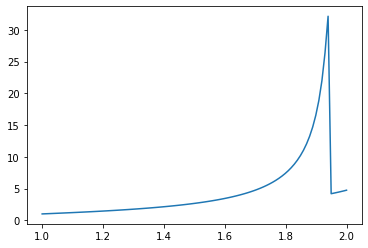

In [21]:
from scipy.integrate import odeint

def f(U, t):
    u1, u2, u3 = U
    return [u2, u3, np.exp(-t)*np.sin(3*t) - u3**2 + 3*u2**3 - np.cos(u1)**2]

U0 = [1, 2, 1]
t = np.linspace(1, 2, 100)
U = odeint(f, U0, t)

# Extract the solution y(t)
y = U[:, 0]
plot(t, y )
show()

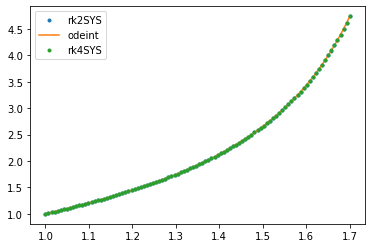

In [22]:
def f(U, t):
    u1, u2, u3 = U
    return array([u2, u3, exp(-t)*sin(3*t) - u3**2 + 3*u2**3 - cos(u1)**2])

U0 = [1, 2, 1]
t = linspace(1, 1.7, 100)

# Solve the system using rk2SYS
U_rk2 = rk2SYS(f, U0, t)
y_rk2 = U_rk2[:, 0]
#RKAKA4
U_rk4 = rk4SYS(f, U0, t)
y_rk4 = U_rk4[:, 0]

# Solve the system using odeint
U_odeint = odeint(f, U0, t)
y_odeint = U_odeint[:, 0]

# Plot the solutions
plt.plot(t, y_rk2,'.', label='rk2SYS')
plt.plot(t, y_odeint, label='odeint')
plt.plot(t, y_rk4,'.', label='rk4SYS')
plt.legend()
plt.show()

In [23]:
def rk4SYS(f, U0, t):
    n = len(t)
    U = [U0]
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h * f(U[i], t[i])
        k2 = h * f(U[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(U[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(U[i] + k3, t[i+1])
        U.append(U[i] + (k1 + 2*k2 + 2*k3 + k4) / 6)
    return array(U)